In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [7]:
gold = pd.read_csv('Dataset/gld_price_data.csv')

In [8]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


###### getting some basic informations about the data

In [9]:
gold.shape

(2290, 6)

In [10]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation:

Positive Correlation                                    
Negative Correlation

In [14]:
# Assuming 'Date' is the column containing date values
# Drop the 'Date' column before calculating correlation
numeric_data = gold.drop('Date', axis=1)

# Convert the remaining columns to numeric values
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

# Calculate correlation
correlation = numeric_data.corr()

<Axes: >

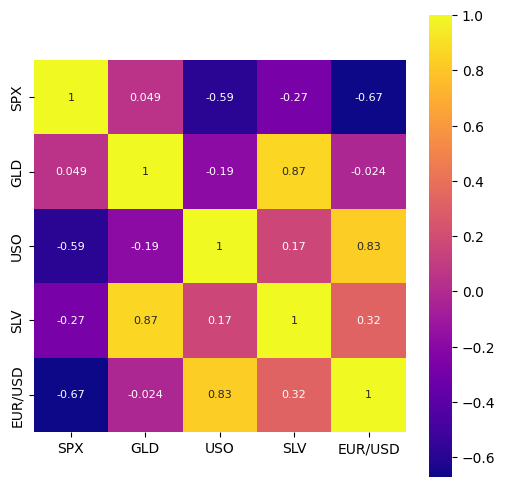

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={"size":8},cmap="plasma")

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


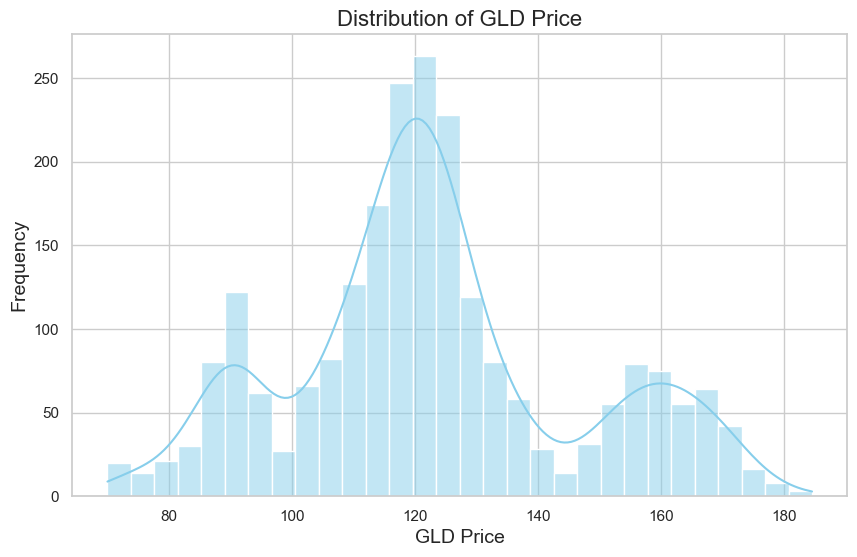

In [18]:
# checking the distribution of the GLD Price
# Set the style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution with a histogram and KDE
sns.histplot(gold['GLD'], bins=30, kde=True, color='skyblue', ax=ax)

# Add title and labels
plt.title('Distribution of GLD Price', fontsize=16)
plt.xlabel('GLD Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

##### Splitting the Features and Target

In [19]:
X = gold.drop(['Date','GLD'],axis=1)
y = gold['GLD']

In [20]:
y.shape

(2290,)

### training the model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [32]:
# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_cv_score = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [33]:
# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_cv_score = cross_val_score(lr_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [34]:
# Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_cv_score = cross_val_score(svr_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [35]:
# Display results
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest Cross-Validation Scores: {rf_cv_score.mean()}")

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression Cross-Validation Scores: {lr_cv_score.mean()}")

print(f"SVR RMSE: {svr_rmse}")
print(f"SVR Cross-Validation Scores: {svr_cv_score.mean()}")

Random Forest RMSE: 2.3425145217474403
Random Forest Cross-Validation Scores: -5.956245881476739
Linear Regression RMSE: 7.494370835167287
Linear Regression Cross-Validation Scores: -66.7956476039369
SVR RMSE: 21.82140856705699
SVR Cross-Validation Scores: -497.2097511402911


In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [37]:
# Create Random Forest Regressor
rf_reg = RandomForestRegressor()

In [38]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [39]:
# Get the best parameters
best_params = grid_search.best_params_

In [40]:
# Train Random Forest with the best parameters
best_rf_reg = RandomForestRegressor(**best_params)
best_rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [41]:
# Make predictions and evaluate
best_rf_pred = best_rf_reg.predict(X_test)
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred))

In [42]:
print(f"Best Random Forest RMSE: {best_rf_rmse}")
print(f"Best Random Forest Parameters: {best_params}")

Best Random Forest RMSE: 2.3324210744845026
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
